In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install mglearn
!pip install scikit-learn

  Using cached numpy-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cache

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/home/pvkothalkar2/workspace-projects/gender-detection-from-voice/code'

In [3]:
# pip install mglearn

In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [21]:
gen = pd.read_csv('gender_voice_dataset.csv')

gen_data = pd.DataFrame(gen)
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
"""
1 target variable: label (male or female)

20 independent variables:
meanfreq: mean frequency of the voice audio of the person (in kHz)
sd: standard deviation of the frequency of the voice audio
median: median frequency of the voice audio (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
meanfun: mean fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: mean of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index
"""

In [ ]:
"""
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
If the skewness is less than -1 or greater than 1, the data are highly skewed.
"""

In [5]:
# Specprop: This function returns a list of statistical properties of a frequency spectrum, which ahve been defined above.
# For more info you can visit: https://rdrr.io/cran/seewave/man/specprop.html

In [6]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
# You can see for columns like Q25 and maxdom we have very large range as compared to other columns, for this we have have to standardize or 
# normalize the data. You can leave them as it si also but this may bring down the predictive power of the model.

In [13]:
label_mapping = {  'female':0, 'male':1}

In [22]:
gen_data['label'].replace({'male': 1,'female': 0},inplace=True)

/tmp/ipykernel_18565/1406037725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gen_data['label'].replace({'male': 1,'female': 0},inplace=True)
/tmp/ipykernel_18565/1406037725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gen_data['label'].replace({'male': 1,'female': 0},inplace=True)


In [23]:
gen_data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

<Axes: >

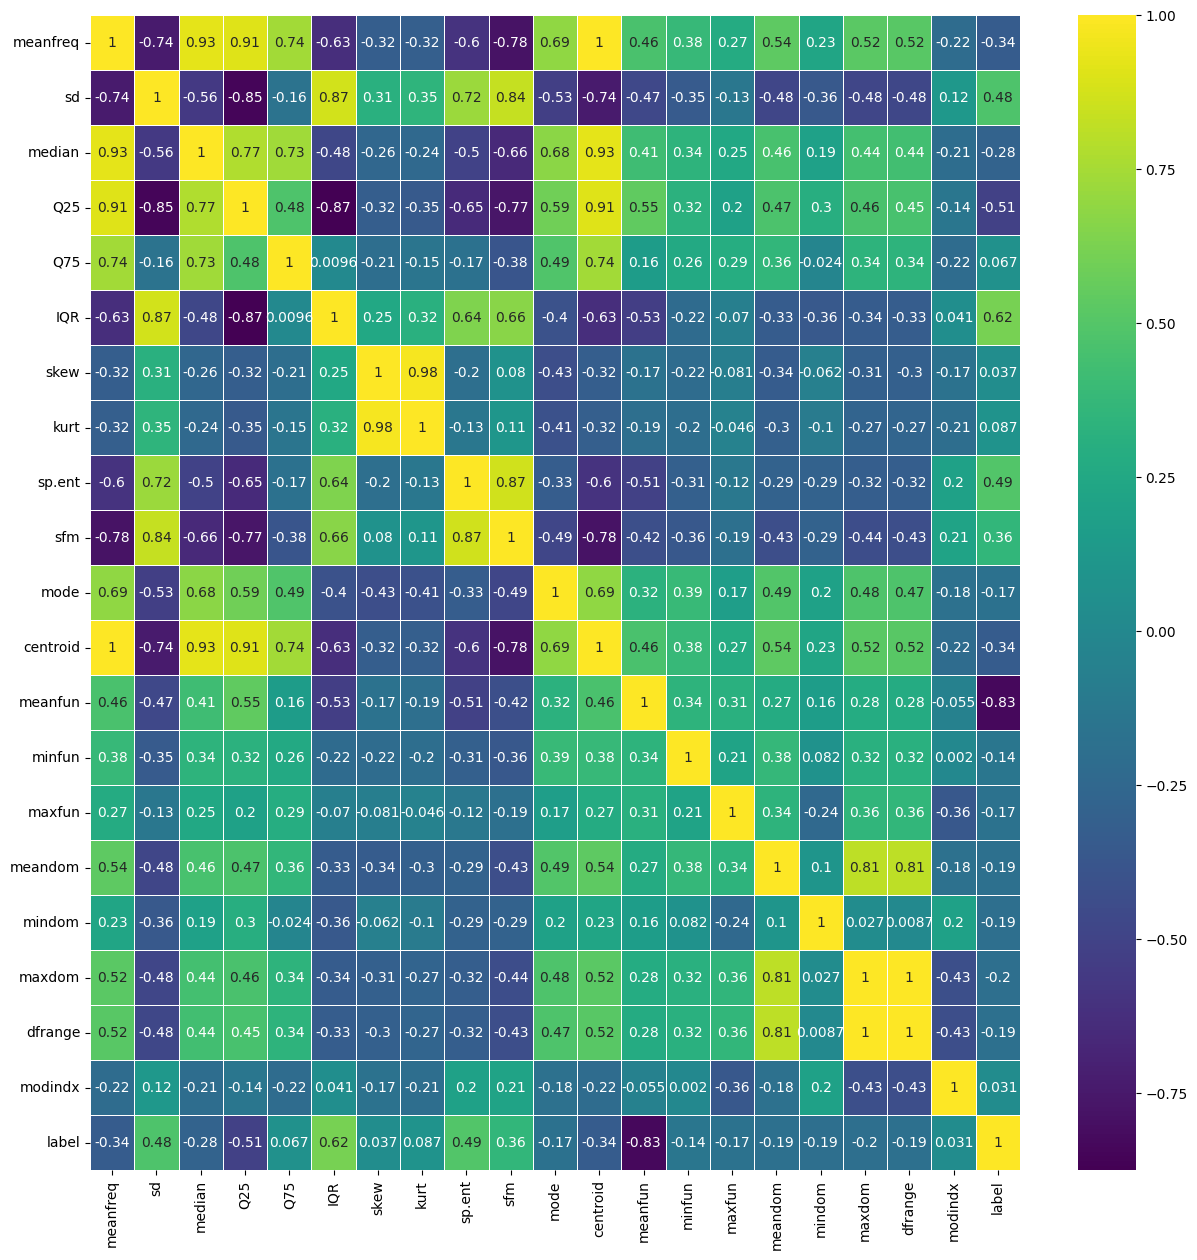

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [11]:
# We already understood about correlation, from here we can see that alot of columns are directly or inversely correlated with some 
# other columns having correlation value as high as 0.98
# Hence we will be removinfg some columns that don't help the model in learning or generalizing over the data.

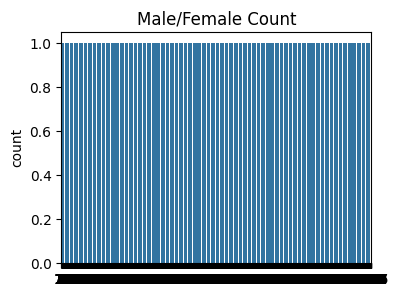

In [25]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(gen_data['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

In [14]:
# There is no case of imbalance class, meaning one class doesn't dominate in the dataset.

In [27]:
gen.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


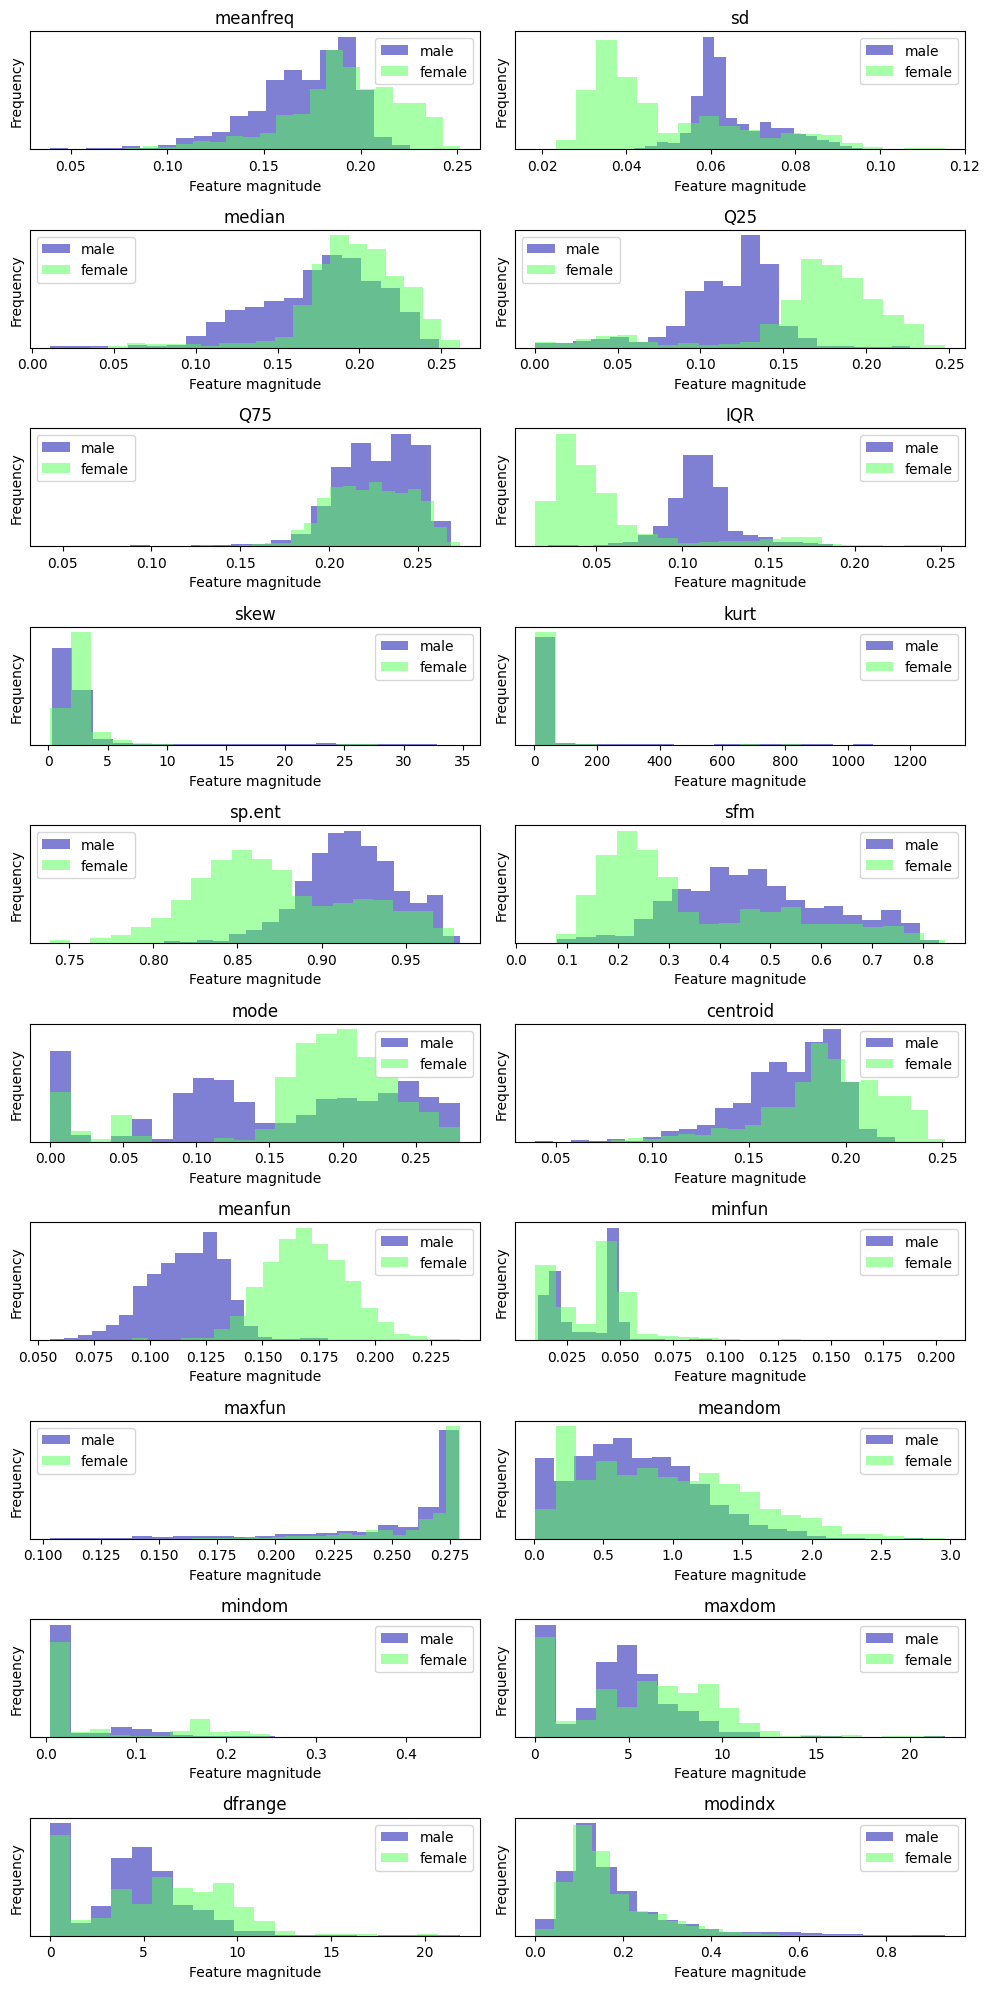

In [28]:
#Plot the histograms
male = gen.loc[gen['label']==1]
female = gen.loc[gen['label']==0]
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [ ]:
# from the graph we can see which are the columns that able to define male and female separetely.

In [29]:
gen_new = gen_data.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [30]:
gen_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

In [31]:
y = gen_new['label']
X = gen_new.drop(['label'], axis = 1)

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [33]:
#Train support vector machine model
svm = SVC().fit(Xtrain, ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Support Vector Machine
Accuracy on training set: 0.73
Accuracy on test set: 0.67


In [34]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.96


In [35]:
# Welp lets go with RandonForestClassifier 

In [35]:
# save the model to disk
import pickle
filename = 'voice_model.pickle'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
"""
# load the model from disk
filename = 'drive/MyDrive/Dataset/Models/pokemon_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)
"""